In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
print(tf.__version__)

1.12.0


In [3]:
QBtrain = pd.read_csv('TrainingBig/QBtrain.csv')
QBtrain.columns

Index(['Unnamed: 0', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'Third

In [4]:
QBtrain = QBtrain.drop('Unnamed: 0', axis=1)

In [5]:
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,...,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000
mean,19.548188,30.691233,59.781149,223.412351,6.899885,1.381912,0.714657,85.206313,2.773725,11.428592,...,55.511927,6.180849,14.901548,86.189794,63.095356,238.538818,6.782741,10.743979,1.577541,88.158257
std,7.383635,10.939082,16.479511,86.527073,2.208274,0.791808,0.525759,26.382373,1.960820,12.210408,...,8.624861,1.292997,2.251992,112.722717,3.392365,24.066005,0.596408,0.750214,0.367753,9.163722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,34.800000,3.000000,10.500000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,17.702381,29.000000,59.390659,195.000000,6.500000,1.000000,0.333333,78.580714,1.400000,2.000000,...,50.000000,5.400000,13.300000,34.000000,60.600000,224.875000,6.400000,10.200000,1.312500,82.000000
50%,21.387500,33.333333,63.570833,244.154762,7.271429,1.400000,0.679487,90.371667,2.333333,7.500000,...,55.300000,6.150000,14.400000,35.562500,63.200000,237.500000,6.800000,10.700000,1.555556,88.000000
75%,24.111111,37.200000,67.108482,274.687500,7.911111,2.000000,1.000000,99.432083,3.750000,17.258929,...,60.000000,7.000000,16.400000,39.062500,64.800000,251.250000,7.200000,11.200000,1.875000,94.000000
max,39.000000,53.000000,100.000000,439.000000,22.000000,5.000000,4.000000,158.330000,14.000000,104.000000,...,87.500000,10.100000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.812500,121.000000


In [6]:
QBtrain.head()

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [7]:
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts',

In [8]:
df = QBtrain.drop(['Name', 'Home'], axis=1).astype('float64')

In [9]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df)
y_noano = clf.predict(df)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 175
Number of rows without outliers: 1569


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [10]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [11]:
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CompletionsGame,1395.0,19.492073,7.431736,0.000000,17.666667,21.400000,24.000000,39.000000
AttemptsGame,1395.0,30.562899,11.019489,0.000000,29.000000,33.333333,37.000000,53.000000
PassingCompletionPercentage,1395.0,59.773181,16.841480,0.000000,59.545000,63.628571,67.181818,100.000000
YardsGame,1395.0,222.523673,87.201533,0.000000,194.173077,244.000000,274.944444,439.000000
PassingYardsPerAttempt,1395.0,6.884207,2.236404,0.000000,6.492857,7.275000,7.917094,18.000000
PassingTouchdownsGame,1395.0,1.383920,0.802935,0.000000,1.000000,1.400000,2.000000,5.000000
InterceptionsGame,1395.0,0.710787,0.525862,0.000000,0.333333,0.692308,1.000000,4.000000
PassingRating,1395.0,85.296935,26.917575,0.000000,78.563750,90.540000,99.680000,158.330000
RushingAttemptsGame,1395.0,2.756036,1.974324,0.000000,1.400000,2.333333,3.750000,14.000000
RushingYardsGame,1395.0,11.293459,12.352236,-7.000000,2.000000,7.111111,16.759615,104.000000


In [12]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
df_labels = df.pop('Score')

In [13]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_df = norm(df)

In [14]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [15]:
model = build_model()

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [17]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 1.3048444 ],
       [-1.7006965 ],
       [-1.3348978 ],
       [ 0.64539355],
       [ 1.2200869 ],
       [ 0.28345406],
       [ 2.1344585 ],
       [-0.74389553],
       [ 1.0877951 ],
       [-0.3591174 ]], dtype=float32)

In [18]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,81.158626,7.222113,81.158626,19.506973,3.440861,19.506973,495
496,81.688042,7.252037,81.688042,19.648072,3.441641,19.648072,496
497,80.835292,7.213082,80.835292,19.497793,3.440710,19.497793,497
498,82.697834,7.267249,82.697834,19.494713,3.429921,19.494713,498
499,83.081058,7.293226,83.081058,19.580185,3.445940,19.580185,499


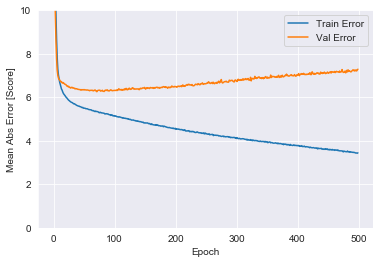

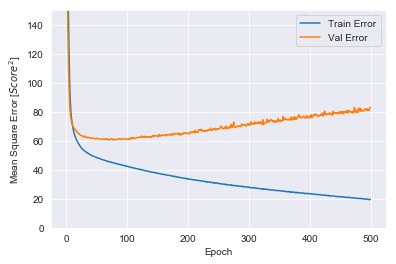

In [20]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Score]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,10])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Score^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,150])

plot_history(history)

In [21]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  7.01 Score



.................................................................................

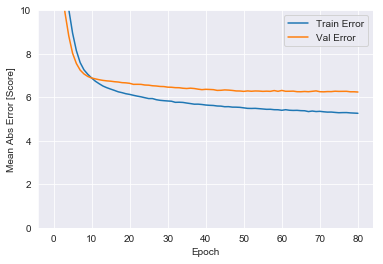

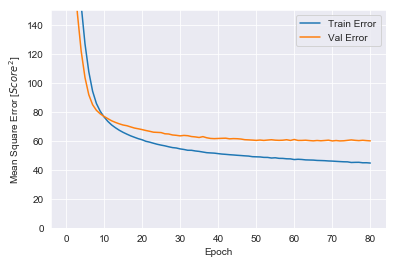

In [22]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  6.14 Score


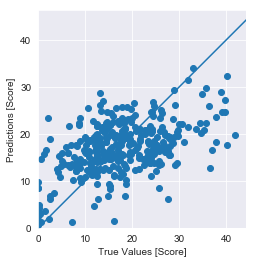

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Score]')
plt.ylabel('Predictions [Score]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

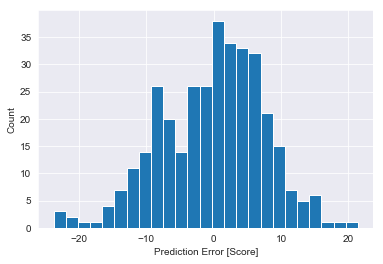

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Score]")
_ = plt.ylabel("Count")

In [26]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


..................

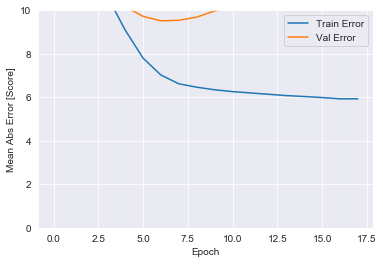

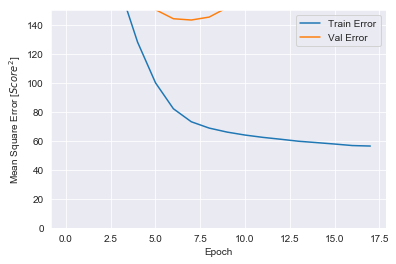

In [27]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_df, df_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [28]:
Offense = pd.read_csv('Input/Offense/Offense.csv')
Offense = Offense.set_index('Team')
Offense.head()


,PointsPerGame,Score,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,...,OpponentTacklesForLossPercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
SF,23.0,230,633,3565,5.6,216,121,39.7,32,46.9,...,27.6,8.9,19.4,319,62.1,2229,7.0,11.3,17,85
CHI,29.9,269,561,3271,5.8,192,112,42.9,32,65.6,...,18.6,5.8,11.7,290,65.5,2190,7.6,11.5,19,100
CIN,26.1,235,524,3038,5.8,183,96,38.5,27,77.8,...,27.6,5.9,10.0,319,63.6,2186,6.9,10.8,18,89
BUF,13.7,137,634,2686,4.2,160,143,30.8,19,57.9,...,26.1,9.7,18.5,317,55.8,1598,5.0,9.0,5,54
DEN,22.8,205,576,3394,5.9,189,116,35.3,26,53.8,...,19.5,6.8,17.2,331,63.7,2254,6.8,10.7,12,83


In [29]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [30]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [31]:
QBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [32]:
RBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [33]:
WROffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [34]:
Def = pd.read_csv('Input/Defense/Def.csv')
Def['Opponent'] = Def['Team']
Def = Def.drop('Team', axis=1)
Def = Def.set_index('Opponent')
Def.head()

,OpponentPointsPerGame,OpponentScore,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,TacklesForLossPercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Opponent,,,,,,,,,,,,,,,,,,,,,
SF,26.6,266,633,3442,5.4,203,133,37.6,40,57.5,...,23.4,6.6,15.2,356,60.4,2420,6.8,11.3,21,98
CHI,19.4,175,577,2876,5.0,164,125,34.4,19,68.4,...,25.7,8.2,15.8,337,62.6,2120,6.3,10.0,17,78
CIN,32.0,288,644,4091,6.4,238,130,56.2,35,68.6,...,14.5,5.4,14.4,368,66.8,2820,7.7,11.5,21,97
BUF,25.1,251,611,3022,4.9,187,131,38.2,31,67.7,...,29.0,7.0,16.2,334,64.4,2024,6.1,9.4,14,85
DEN,23.7,213,571,3276,5.7,169,120,37.5,29,58.6,...,21.5,8.6,17.5,297,63.0,2092,7.0,11.2,16,91


In [35]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [36]:
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [37]:
QBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [38]:
RBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [39]:
QB = pd.read_csv('Input/Aggregate/QBAggregate.csv')
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()

,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,23.100000,34.500000,67.0,315.000000,9.1,3.100000,0.700000,117.42,3.600000,15.800000,4.4,0.200000,29.5
Matt Ryan,ATL,2,27.888889,39.222222,71.1,335.000000,8.5,2.333333,0.333333,113.21,2.111111,8.888889,4.2,0.222222,26.8
Jared Goff,LAR,3,22.700000,33.200000,68.4,313.400000,9.4,2.200000,0.600000,112.95,3.100000,8.200000,2.6,0.000000,24.0
Ben Roethlisberger,PIT,4,27.111111,41.000000,66.1,320.888889,7.8,2.333333,0.777778,100.86,2.222222,8.333333,3.8,0.222222,25.8
Mitch Trubisky,CHI,5,21.111111,32.222222,65.5,256.000000,7.9,2.111111,0.777778,101.57,4.555556,35.555556,7.8,0.333333,24.8


In [40]:
QBRZ = pd.read_csv('Input/RZ/QBRZ.csv')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,4.000000,6.100000,65.6,32.500000,5.3,2.200000,0.100000,111.68,0.900000,2.900000,3.2,0.200000,11.5
Andrew Luck,4.444444,7.333333,60.6,33.111111,4.5,2.333333,0.111111,104.67,0.333333,1.555556,4.7,0.000000,11.1
Drew Brees,5.111111,7.333333,69.7,31.444444,4.3,1.777778,0.000000,117.61,0.555556,1.333333,2.4,0.333333,10.7
Cam Newton,2.444444,3.333333,73.3,19.777778,5.9,1.333333,0.000000,127.50,1.444444,5.444444,3.8,0.444444,9.8
Jared Goff,3.900000,6.100000,63.9,28.900000,4.7,1.600000,0.200000,101.02,0.500000,0.600000,1.2,0.000000,8.0


In [41]:
QBsnaps = pd.read_csv('Input/Aggregate/QBSnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jeff Driskel,CIN,QB,2,16,8.0,2.9,18.8,0.0,62.5,62.5,13.36,83.5
1,2,Patrick Mahomes,KC,QB,10,643,64.3,100.0,5.6,0.0,59.3,59.3,294.80,45.8
2,3,Ryan Fitzpatrick,TB,QB,7,387,55.3,59.9,8.3,0.0,66.4,66.4,179.76,46.4
3,4,Cam Newton,CAR,QB,9,568,63.1,98.8,13.2,0.0,64.6,64.6,212.64,37.4
4,5,Matt Ryan,ATL,QB,9,609,67.7,98.5,3.1,0.0,61.1,61.1,241.60,39.7


In [42]:
QBsnaps = QBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
QBsnaps = QBsnaps.set_index('Name')

In [43]:
Defense = pd.read_csv('Input/Defense/Defense.csv')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
BAL,17.40
JAX,17.27
TEN,17.06
BUF,14.41
MIN,18.47


In [44]:
QBSalaries = pd.read_csv('Input/Salaries/QBSalaries.csv').dropna()
QBSalaries = QBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
QBSalaries = QBSalaries.set_index('Opponent')
QBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
LAR,Patrick Mahomes,KC,7100.0,28.03
KC,Jared Goff,LAR,6400.0,25.62
DAL,Matt Ryan,ATL,6100.0,23.81
DET,Cam Newton,CAR,6200.0,23.79
PHI,Drew Brees,NO,6500.0,21.28


In [45]:
Vegas = pd.read_csv('Input/Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Home,PointSpread,OverUnder,total
Team,,,,
SEA,True,-2.5,49.0,25.75
HOU,False,-2.5,42.5,22.50
NYG,True,-2.0,52.0,27.00
CAR,False,-3.5,51.0,27.25
IND,True,-2.0,48.0,25.00


In [46]:
QBSalaries = QBSalaries.join(QBDef).join(QBDefense)
QBSalaries = QBSalaries.set_index('Team').join(Vegas).join(QBOffense)
QBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Josh Rosen,4800.0,15.91,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
ARI,Mike Glennon,4500.0,0.19,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
ATL,Matt Ryan,6100.0,23.81,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.7
ATL,Matt Schaub,4400.0,0.06,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.7
BAL,Lamar Jackson,4700.0,12.08,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,...,71.100000,367.071831,5.2,23.254930,14.687324,45.5,3.671831,66.7,4.2,10.5


In [47]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,15.91,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
Mike Glennon,4500.0,0.19,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,8.6,22.2
Matt Ryan,6100.0,23.81,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.7
Matt Schaub,4400.0,0.06,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,6.2,16.7
Lamar Jackson,4700.0,12.08,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,71.100000,367.071831,5.2,23.254930,14.687324,45.5,3.671831,66.7,4.2,10.5


In [48]:
QBs = QBSalaries.join(QBavg).join(QBRZ).join(QBsnaps).dropna()
QBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,15.91,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.000000,3.0,55.3,74.1,2.6,0.0,56.3,56.3,18.6
Matt Ryan,6100.0,23.81,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,4.5,0.222222,8.6,67.7,98.5,3.1,0.0,61.1,61.1,39.7
Matt Schaub,4400.0,0.06,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,0.000000,0.0,5.0,1.6,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,4700.0,12.08,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,4.1,0.111111,1.1,9.7,12.9,32.2,2.3,46.0,48.3,31.5
Joe Flacco,5300.0,6.90,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,0.0,0.000000,5.0,71.1,95.1,3.0,0.0,62.2,62.2,23.5


In [49]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test

,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,3.886029,51.4,...,0.0,0.000000,3.0,55.3,74.1,2.6,0.0,56.3,56.3,18.6
Matt Ryan,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,3.000000,48.1,...,4.5,0.222222,8.6,67.7,98.5,3.1,0.0,61.1,61.1,39.7
Matt Schaub,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,3.000000,48.1,...,0.0,0.000000,0.0,5.0,1.6,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,3.888889,68.6,...,4.1,0.111111,1.1,9.7,12.9,32.2,2.3,46.0,48.3,31.5
Joe Flacco,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,3.888889,68.6,...,0.0,0.000000,5.0,71.1,95.1,3.0,0.0,62.2,62.2,23.5
Cam Newton,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,3.220902,55.2,...,3.8,0.444444,9.8,63.1,98.8,13.2,0.0,64.6,64.6,37.4
Taylor Heinicke,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,3.220902,55.2,...,0.0,0.000000,0.0,3.0,1.0,33.3,0.0,50.0,50.0,5.3
Mitch Trubisky,18.47,22.7,61.312255,322.696078,5.3,19.250490,11.238725,25.7,3.672059,39.4,...,5.2,0.333333,8.9,65.8,99.2,6.9,0.0,55.9,55.9,37.7
Chase Daniel,18.47,22.7,61.312255,322.696078,5.3,19.250490,11.238725,25.7,3.672059,39.4,...,0.0,0.000000,0.0,2.3,1.2,71.4,0.0,71.4,71.4,-7.1


In [50]:
columns = train.drop('Score', axis=1)
X_test = X_test[columns.columns]

In [51]:
normed_x_test = norm(X_test)

In [52]:
new_predictions = model.predict(normed_x_test).flatten()

In [53]:
new_predictions

array([ 19.089712  ,  10.436861  , -19.62873   ,   0.8151407 ,
        16.995417  ,  20.352676  ,   1.7242873 ,   7.7368155 ,
        -5.928237  ,  -1.6962695 ,   3.7559822 ,  14.85277   ,
         1.4791765 ,   1.1459941 ,   7.185399  ,  -0.3974167 ,
         4.235327  ,  -4.2262383 ,   6.130313  ,  -4.956786  ,
        -3.9883845 ,   6.216037  ,  -5.1847906 ,   2.3437102 ,
        -9.189546  ,  11.865526  ,   1.7275517 ,  -1.9421046 ,
         5.9185123 ,  -8.012254  ,   1.9509573 ,   8.939476  ,
        -7.4392357 ,  -7.832698  ,  15.166482  ,  -0.980844  ,
        -2.27084   ,  10.845183  ,   0.9312966 ,  10.682482  ,
        -2.310525  ,   1.1124742 ,   3.4455059 ,   3.792404  ,
         5.2326117 ,   0.07919645,   3.4128058 ], dtype=float32)

In [54]:
QBs['DNN'] = new_predictions

In [55]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test = X_test[X_train.columns]

In [56]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [57]:
QBNe = neigh.predict(X_test)

In [58]:
QBs['NeProjections'] = QBNe

In [59]:
QBScores = pd.read_csv('Scores/QBScores.csv')
QB = pd.DataFrame({'Name': [], 'Score': []})
QB['Name'] = QBScores['Name']
QB['Score'] = QBScores['FantasyPointsDraftKings']
QB = QB.set_index('Name')
QBs = QBs.join(QB)
QBs = QBs.dropna()
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,15.91,20.38,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,55.3,74.1,2.6,0.0,56.3,56.3,18.6,19.089712,12.256,15.44
Matt Ryan,6100.0,23.81,18.99,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,67.7,98.5,3.1,0.0,61.1,61.1,39.7,10.436861,19.896,14.74
Lamar Jackson,4700.0,12.08,27.18,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,9.7,12.9,32.2,2.3,46.0,48.3,31.5,0.815141,3.000,19.70
Cam Newton,6200.0,23.79,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,...,63.1,98.8,13.2,0.0,64.6,64.6,37.4,20.352676,23.484,28.48
Taylor Heinicke,4000.0,0.04,20.12,27.1,57.865164,361.962705,6.3,20.547131,10.773361,39.2,...,3.0,1.0,33.3,0.0,50.0,50.0,5.3,1.724287,2.532,0.00
Mitch Trubisky,5700.0,19.25,18.47,22.7,61.312255,322.696078,5.3,19.250490,11.238725,25.7,...,65.8,99.2,6.9,0.0,55.9,55.9,37.7,7.736815,13.132,16.90
Andy Dalton,5000.0,15.40,17.40,17.8,64.080000,305.381250,4.8,18.690000,13.906250,35.2,...,60.2,97.3,2.2,0.0,59.8,59.8,30.1,-1.696270,20.460,19.34
Jeff Driskel,4300.0,0.13,17.40,17.8,64.080000,305.381250,4.8,18.690000,13.906250,35.2,...,8.0,2.9,18.8,0.0,62.5,62.5,83.5,3.755982,5.576,0.00
Dak Prescott,5200.0,19.68,26.52,28.2,63.283465,414.007087,6.5,24.314173,11.768504,51.9,...,63.3,99.0,8.4,0.2,56.3,56.5,27.7,14.852770,22.472,14.82


In [60]:
y_test = QBs.Score
y_pred = QBs.DNN
mean_squared_error(y_test, y_pred)

200.26849976900542

In [61]:
y_test = QBs.Score
y_pred = QBs.NeProjections
mean_squared_error(y_test, y_pred)

69.72644235294118

In [62]:
RBtrain = pd.read_csv('TrainingBig/RBtrain.csv')
RBtrain.columns


Index(['Unnamed: 0', 'Name', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'OpponentTacklesForLossPercentage',
       'OpponentPointsPerGame', 'OpponentOffensivePlays',
       'OpponentOffensiveYards', 'OpponentOffensiveYardsPerPlay',
       'OpponentFirstDowns', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZ

In [63]:
RBtrain = RBtrain.drop('Unnamed: 0', axis=1)
RBtrain = RBtrain.set_index('Name')

In [64]:
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,...,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000
mean,5.873846,24.118057,2.660894,0.167397,1.888867,1.412501,11.619435,0.055249,6.460759,6.803122,...,5.455344,20.016996,13.211577,39.126473,3.125439,55.378007,109.924773,4.170106,19.081164,0.790667
std,6.133924,26.956516,2.124262,0.289866,1.955788,1.514717,13.822263,0.136668,6.519144,8.323319,...,0.412457,1.773364,0.824517,4.134096,0.444001,8.403131,16.145998,0.402261,4.200176,0.266087
min,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-0.700000,-1.800000,...,4.400000,16.062500,10.564655,25.200000,1.750000,34.800000,79.187500,3.300000,10.100000,0.221714
25%,0.500000,1.000000,0.666667,0.000000,0.333333,0.181818,1.000000,0.000000,0.873214,0.000000,...,5.200000,18.804225,12.812500,36.800000,2.812500,50.000000,98.187500,3.900000,16.200000,0.625000
50%,3.591667,14.000000,2.927273,0.000000,1.250000,1.000000,6.666667,0.000000,4.600000,3.700000,...,5.500000,19.937500,13.250000,39.000000,3.187500,55.300000,109.250000,4.100000,19.000000,0.750000
75%,10.138393,40.342857,4.013839,0.250000,3.000000,2.200000,18.000000,0.000000,10.200000,10.500000,...,5.700000,20.959766,13.812500,41.100000,3.437500,60.000000,120.875000,4.400000,21.700000,0.937500
max,31.000000,168.000000,28.000000,3.000000,13.000000,10.000000,129.000000,2.000000,49.600000,55.600000,...,6.700000,26.444444,15.062500,56.200000,4.125000,87.500000,165.812500,5.200000,33.000000,1.562500


In [65]:
RB = pd.read_csv('Input/Aggregate/RBAggregate.csv')
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,19.800000,98.800000,5.0,1.300000,5.300000,4.000000,40.200000,0.400000,30.1
Alvin Kamara,NO,2,13.666667,60.666667,4.4,1.222222,7.888889,6.111111,52.555556,0.333333,28.2
James Conner,PIT,3,18.222222,85.666667,4.7,1.111111,5.666667,4.333333,43.000000,0.111111,26.5
Saquon Barkley,NYG,4,14.555556,65.111111,4.5,0.555556,8.444444,6.888889,58.888889,0.222222,24.8
Melvin Gordon,LAC,5,15.625000,84.000000,5.4,0.875000,6.500000,4.500000,45.125000,0.500000,27.7


In [66]:
RB_RZ = pd.read_csv('Input/RZ/RBRZ.csv')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,5.200000,16.700000,3.2,1.300000,1.500000,0.800000,6.900000,0.300000,13.4
Alvin Kamara,4.222222,12.777778,3.0,1.111111,2.222222,1.777778,11.777778,0.333333,13.3
Kareem Hunt,2.500000,6.900000,2.8,0.700000,0.900000,0.600000,5.400000,0.300000,7.8
Melvin Gordon,2.250000,12.500000,5.6,0.750000,1.500000,0.875000,3.500000,0.375000,9.7
James White,1.500000,2.600000,1.7,0.300000,1.500000,1.100000,8.000000,0.600000,7.6


In [67]:
RBsnaps = pd.read_csv('Input/Aggregate/RBSnaps.csv')
RBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Zach Zenner,DET,RB,1,2,2.0,2.6,50.0,0.0,50.0,50.0,1.2,60.0
1,2,Nick Chubb,CLE,RB,10,188,18.8,26.0,50.0,5.3,53.2,55.3,110.7,58.9
2,3,Melvin Gordon,LAC,RB,8,360,45.0,73.5,34.7,14.4,44.7,49.2,221.3,61.5
3,4,Kenneth Dixon,BAL,RB,1,22,22.0,27.5,59.1,0.0,59.1,59.1,10.4,47.3
4,5,Marlon Mack,IND,RB,5,161,32.2,48.9,48.4,8.1,53.4,56.5,89.5,55.6


In [68]:
RBsnaps = RBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
RBsnaps = RBsnaps.set_index('Name')

In [69]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
BAL,17.57
JAX,20.62
TEN,17.60
BUF,27.03
MIN,21.30


In [70]:
RBSalaries = pd.read_csv('Input/Salaries/RBSalaries.csv').dropna()
RBSalaries = RBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
RBSalaries = RBSalaries.set_index('Opponent')
RBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
KC,Todd Gurley,LAR,9600.0,30.20
TB,Saquon Barkley,NYG,8700.0,25.28
PHI,Alvin Kamara,NO,8200.0,23.83
DEN,Melvin Gordon,LAC,8900.0,22.87
DET,Christian McCaffrey,CAR,8000.0,21.99


In [71]:
RBSalaries = RBSalaries.join(RBDef).join(RBDefense)
RBSalaries = RBSalaries.set_index('Team').join(Vegas).join(RBOffense)
RBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,David Johnson,7500.0,20.27,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ARI,Chase Edmonds,3900.0,3.03,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ARI,TJ Logan,3000.0,0.49,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ARI,Derrick Coleman,3000.0,0.30,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
ATL,Tevin Coleman,5300.0,14.04,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,27.1,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,31.5


In [72]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7500.0,20.27,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
Chase Edmonds,3900.0,3.03,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
TJ Logan,3000.0,0.49,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
Derrick Coleman,3000.0,0.30,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,13.8,55.756452,236.603226,4.2,14.579032,11.796774,29.2,1.780645,68.8,29.6
Tevin Coleman,5300.0,14.04,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,27.1,64.862295,408.721311,6.3,23.101639,13.216803,51.3,3.220902,69.0,31.5


In [73]:
RBs = RBSalaries.join(RBavg).join(RBRZ).join(RBsnaps).dropna()
RBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7500.0,20.27,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,1.333333,0.111111,5.8,47.7,82.2,33.3,10.0,40.6,43.4,36.2
Chase Edmonds,3900.0,3.03,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.000000,0.000000,0.1,11.2,19.3,23.8,14.9,36.6,38.6,25.8
TJ Logan,3000.0,0.49,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.000000,0.000000,0.0,1.3,2.2,0.0,50.0,50.0,50.0,85.0
Derrick Coleman,3000.0,0.30,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.000000,0.000000,0.0,4.6,7.9,4.9,4.9,9.8,9.8,9.8
Tevin Coleman,5300.0,14.04,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,5.222222,0.333333,4.4,40.0,58.3,29.4,8.3,35.8,37.8,35.7


In [74]:
RB_train = RBtrain.drop('Home', axis=1)

In [75]:
train_dataset = RB_train.sample(frac=0.8,random_state=0)
test_dataset = RB_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
RushesGame,4536.0,5.863156,6.103093,0.000000,0.500000,3.666667,10.000000,29.000000
RushYardGame,4536.0,24.081778,26.796226,-8.000000,1.106061,14.180556,40.178571,168.000000
YardAttempt,4536.0,2.677141,2.160717,-8.000000,0.666667,2.940833,4.014286,28.000000
RushTdGame,4536.0,0.166228,0.286371,0.000000,0.000000,0.000000,0.250000,3.000000
TargetsGame,4536.0,1.884269,1.950388,0.000000,0.333333,1.250000,3.000000,13.000000
RecGame,4536.0,1.407763,1.514555,0.000000,0.200000,1.000000,2.153846,10.000000
RecYardsGame,4536.0,11.578776,13.787069,-5.000000,1.000000,6.651515,17.666667,129.000000
RecTdGame,4536.0,0.054470,0.134389,0.000000,0.000000,0.000000,0.000000,2.000000
PointsGame,4536.0,6.435034,6.455977,-0.700000,0.896875,4.633333,10.166667,46.100000
RZattemptsGame,4536.0,0.890969,1.121869,0.000000,0.000000,0.454545,1.432540,8.000000


In [76]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
RB_labels = RB_train.pop('Score')

In [77]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_RB = norm(RB_train)

In [78]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [79]:

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,52.343915,5.200807,52.343915,21.778452,3.363761,21.778452,495
496,51.399210,5.135142,51.399210,21.756311,3.350284,21.756311,496
497,52.350872,5.197742,52.350872,21.733477,3.347194,21.733477,497
498,51.447680,5.132289,51.447680,21.837806,3.349726,21.837806,498
499,50.795717,5.060653,50.795717,21.682881,3.356573,21.682881,499


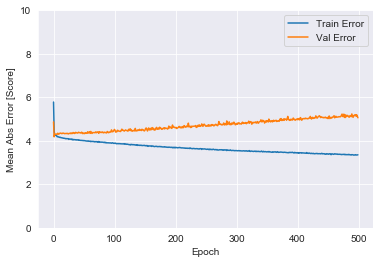

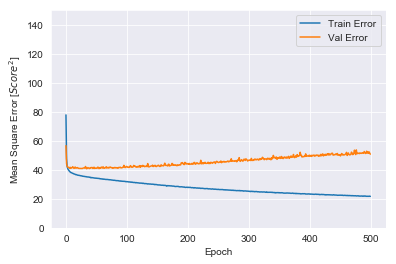

In [81]:
plot_history(history)


...............................

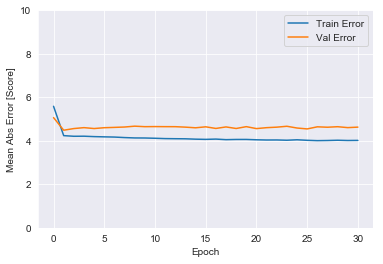

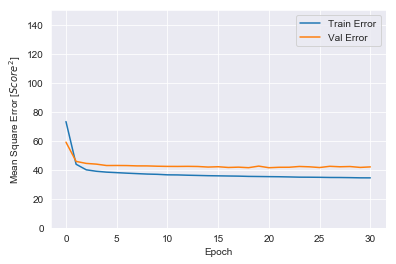

In [82]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_RB, RB_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [83]:
X_test = RBs[RB_train.columns]

In [84]:
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
RBs['DNN'] = new_predictions

In [85]:
X_train = RBtrain.drop('Score', axis=1).astype('float64')
y_train = RBtrain.Score

In [86]:
X_test = RBs[X_train.columns]

In [87]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [88]:
RBNe = neigh.predict(X_test)
RBs['NeProjections'] = RBNe

In [89]:
RBScores = pd.read_csv('Scores/RBScores.csv')
RB = pd.DataFrame({'Name': [], 'Score': []})
RB['Name'] = RBScores['Name']
RB['Score'] = RBScores['FantasyPointsDraftKings']
RB = RB.set_index('Name')
RBs = RBs.join(RB)
RBs = RBs.dropna()
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7500.0,20.27,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,47.7,82.2,33.3,10.0,40.6,43.4,36.2,17.937170,19.48,19.4
Chase Edmonds,3900.0,3.03,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,11.2,19.3,23.8,14.9,36.6,38.6,25.8,9.125289,1.48,1.7
TJ Logan,3000.0,0.49,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,1.3,2.2,0.0,50.0,50.0,50.0,85.0,3.088268,2.12,0.0
Derrick Coleman,3000.0,0.30,29.74,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,4.6,7.9,4.9,4.9,9.8,9.8,9.8,6.109260,0.04,0.0
Tevin Coleman,5300.0,14.04,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,40.0,58.3,29.4,8.3,35.8,37.8,35.7,13.265324,23.18,11.5
Ito Smith,3600.0,9.34,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,19.9,29.0,29.6,11.2,39.1,40.8,39.8,7.600951,6.64,4.2
Brian Hill,3000.0,0.38,22.59,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.907812,1.20,0.0
Alex Collins,4400.0,12.42,33.77,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,32.7,43.7,36.4,7.1,41.5,43.5,35.3,17.685442,10.18,7.8
Javorius Allen,3700.0,6.12,33.77,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,33.6,44.9,12.9,14.2,24.5,27.2,31.2,16.625759,8.58,0.2


In [90]:
y_test = RBs.Score
y_pred = RBs.DNN
mean_squared_error(y_test, y_pred)

45.95718614283143

In [91]:
y_test = RBs.Score
y_pred = RBs.NeProjections
mean_squared_error(y_test, y_pred)

47.12309302325582

In [92]:
WRtrain = pd.read_csv('TrainingBig/WRtrain.csv')

In [93]:
WRtrain = WRtrain.drop('Unnamed: 0', axis=1)
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,...,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000
mean,4.962060,3.009023,52.445030,38.539424,0.249585,6.677192,10.415144,0.138261,0.750723,0.581553,...,55.326770,6.182675,14.906773,80.313713,63.087151,238.312672,6.778302,10.738002,1.572850,88.056331
std,3.182322,2.092204,20.365626,28.332924,0.284080,3.226738,5.101521,0.354148,2.388222,1.701648,...,8.432644,1.287264,2.262153,107.025539,3.420941,23.665606,0.593752,0.747667,0.364481,9.221846
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,...,34.800000,3.000000,10.500000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,2.400000,1.272727,42.348798,14.500000,0.000000,4.700000,7.300000,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.000000,60.600000,224.875000,6.400000,10.200000,1.312500,82.000000
50%,4.666667,2.750000,55.953571,34.607692,0.181818,6.885714,10.800000,0.000000,0.000000,0.000000,...,55.300000,6.100000,14.400000,35.375000,63.150000,237.500000,6.800000,10.700000,1.553125,88.000000
75%,7.181818,4.454545,66.405000,57.000000,0.384615,8.700000,13.527597,0.125000,0.111111,0.100000,...,60.000000,7.000000,16.400000,37.937500,64.800000,251.125000,7.200000,11.200000,1.875000,94.000000
max,19.000000,16.000000,100.000000,180.000000,2.000000,26.500000,50.000000,4.000000,31.000000,34.000000,...,87.500000,10.100000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.812500,121.000000


In [94]:
WR = pd.read_csv('Input/Aggregate/WRAggregate.csv')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Adam Thielen,1,MIN,11.666667,8.666667,74.3,105.222222,0.777778,9.0,12.1,0.222222,2.222222,10.0,0,26.6
Michael Thomas,2,NO,9.666667,8.666667,89.7,105.555556,0.777778,10.9,12.2,0.000000,0.000000,0.0,0,24.7
Tyreek Hill,3,KC,8.000000,5.500000,68.8,89.100000,0.900000,11.1,16.2,1.300000,8.100000,6.2,0,22.1
DeAndre Hopkins,4,HOU,10.000000,7.000000,70.0,99.333333,0.777778,9.9,14.2,0.111111,-0.777778,-7.0,0,22.7
Davante Adams,5,GB,10.444444,6.888889,66.0,87.444444,1.000000,8.4,12.7,0.000000,0.000000,0.0,0,22.6


In [95]:
WRRZ = pd.read_csv('Input/RZ/WRRZ.csv')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.333333,1.111111,47.6,11.111111,1.000000,4.8,10.0,0.0,0.0,0.0,0.0,8.2
Michael Thomas,2.111111,1.777778,84.2,13.333333,0.666667,6.3,7.5,0.0,0.0,0.0,0.0,7.1
DeAndre Hopkins,1.666667,1.000000,60.0,7.666667,0.555556,4.6,7.7,0.0,0.0,0.0,0.0,5.1
Tyreek Hill,1.100000,0.900000,81.8,4.500000,0.500000,4.1,5.0,0.0,0.0,0.0,0.0,4.4
Adam Thielen,1.666667,1.222222,73.3,6.555556,0.444444,3.9,5.4,0.0,0.0,0.0,0.0,4.4


In [96]:
WRsnaps = pd.read_csv('Input/Aggregate/WRSnaps.csv')
WRsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Robert Tonyan Jr.,GB,WR,10,13,1.3,2.0,0.0,15.4,7.7,15.4,12.4,95.4
1,2,Tim White,BAL,WR,3,2,0.7,0.8,0.0,50.0,50.0,50.0,2.4,120.0
2,3,Isaiah McKenzie,BUF,WR,2,10,5.0,6.8,30.0,10.0,40.0,40.0,5.6,56.0
3,4,Curtis Samuel,CAR,WR,6,96,16.0,21.8,4.2,16.7,16.7,20.8,51.7,53.9
4,5,Brandon Zylstra,MIN,WR,9,6,0.7,1.0,0.0,16.7,16.7,16.7,3.3,55.0


In [97]:
WRsnaps = WRsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
WRsnaps = WRsnaps.set_index('Name')

In [98]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
BAL,32.91
JAX,28.48
TEN,41.49
BUF,30.05
MIN,30.92


In [99]:
WRSalaries = pd.read_csv('Input/Salaries/WRSalaries.csv').dropna()
WRSalaries = WRSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
WRSalaries = WRSalaries.set_index('Opponent')
WRSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
TB,Odell Beckham Jr,NYG,8400.0,25.48
PHI,Michael Thomas,NO,8800.0,24.64
DAL,Julio Jones,ATL,8500.0,23.98
CHI,Adam Thielen,MIN,8200.0,20.24
JAX,Antonio Brown,PIT,7800.0,20.22


In [100]:
WRSalaries = WRSalaries.join(WRDef).join(QBDefense)
WRSalaries = WRSalaries.set_index('Team').join(Vegas).join(WROffense)
WRSalaries.head()


,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Larry Fitzgerald,5600.0,12.43,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Christian Kirk,4700.0,10.51,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Chad Williams,3000.0,4.82,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,JJ Nelson,3000.0,2.67,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Trent Sherfield,3000.0,0.98,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64


In [101]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5600.0,12.43,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Christian Kirk,4700.0,10.51,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Chad Williams,3000.0,4.82,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
JJ Nelson,3000.0,2.67,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Trent Sherfield,3000.0,0.98,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64


In [102]:
WRs = WRSalaries.join(WRavg).join(WRRZ).join(WRsnaps).dropna()
WRs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5600.0,12.43,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,2.6,52.1,89.8,0.0,13.9,8.5,13.9,20.8
Christian Kirk,4700.0,10.51,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,5.0,0.0,1.1,44.2,76.2,0.5,12.6,8.8,13.1,22.1
Chad Williams,3000.0,4.82,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.2,43.8,67.0,0.0,8.9,3.1,8.9,8.1
JJ Nelson,3000.0,2.67,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.0,11.4,19.7,2.9,10.7,6.8,13.6,6.4
Trent Sherfield,3000.0,0.98,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.0,7.7,11.0,0.0,0.0,0.0,0.0,0.0


In [103]:
WRtrain = WRtrain.set_index('Name')

In [104]:
WR_train = WRtrain.drop('Home', axis=1)

train_dataset = WR_train.sample(frac=0.8,random_state=0)
test_dataset = WR_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,4701.0,4.983682,3.221147,0.000000,2.400000,4.714286,7.200000,19.000000
RecGame,4701.0,3.023288,2.117581,0.000000,1.250000,2.750000,4.500000,16.000000
RecPercentage,4701.0,52.310004,20.390466,0.000000,42.000000,55.928571,66.322222,100.000000
RecYardsGame,4701.0,38.590222,28.471503,-2.000000,14.500000,34.545455,57.000000,180.000000
RecTdGame,4701.0,0.249009,0.283537,0.000000,0.000000,0.181818,0.384615,2.000000
YardsTarget,4701.0,6.640861,3.189104,-2.000000,4.690909,6.866667,8.681818,26.500000
RecYardsRec,4701.0,10.347545,5.044158,-2.000000,7.250000,10.760000,13.475000,50.000000
RushesGame,4701.0,0.137107,0.345195,0.000000,0.000000,0.000000,0.125000,4.000000
RushYardsGame,4701.0,0.751561,2.339619,-7.000000,0.000000,0.000000,0.125000,31.000000
YardAttempt,4701.0,0.589599,1.724112,-7.000000,0.000000,0.000000,0.111111,34.000000


In [105]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



...............................

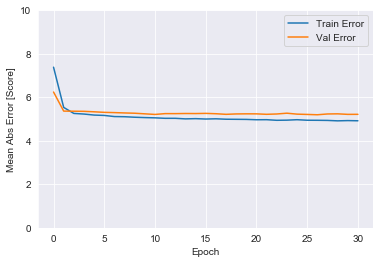

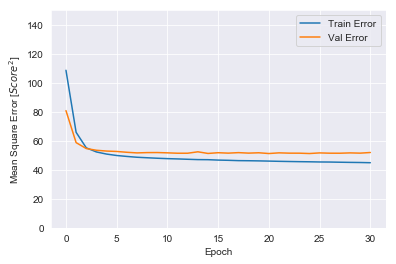

In [106]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [107]:
columns = WR_train.drop('Score', axis=1)
X_test = WRs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
WRs['DNN'] = new_predictions

In [108]:
X_train = WRtrain.drop('Score', axis=1).astype('float64')
y_train = WRtrain.Score
X_test = WRs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
WRNe = neigh.predict(X_test)
WRs['NeProjections'] = WRNe

In [109]:
WRScores = pd.read_csv('Scores/WRScores.csv')
WR = pd.DataFrame({'Name': [], 'Score': []})
WR['Name'] = WRScores['Name']
WR['Score'] = WRScores['FantasyPointsDraftKings']
WR = WR.set_index('Name')
WRs = WRs.join(WR)
WRs = WRs.dropna()
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5600.0,12.43,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,52.1,89.8,0.0,13.9,8.5,13.9,20.8,11.947814,7.720,16.3
Christian Kirk,4700.0,10.51,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,44.2,76.2,0.5,12.6,8.8,13.1,22.1,7.104859,9.600,16.7
JJ Nelson,3000.0,2.67,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,11.4,19.7,2.9,10.7,6.8,13.6,6.4,5.130720,4.720,0.0
Trent Sherfield,3000.0,0.98,36.62,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,7.7,11.0,0.0,0.0,0.0,0.0,0.0,3.443018,2.220,1.6
Julio Jones,8500.0,23.98,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,54.9,79.9,0.2,20.6,13.8,20.9,40.7,19.461943,14.140,26.8
Calvin Ridley,5700.0,12.31,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,39.6,57.6,1.4,13.8,11.5,15.2,37.4,10.695959,19.240,6.7
Mohamed Sanu,5100.0,9.97,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,51.9,75.6,0.2,10.3,7.5,10.5,20.8,12.244649,5.800,9.9
Marvin Hall,3000.0,2.20,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,12.3,18.0,0.0,9.9,8.1,9.9,26.0,2.428488,4.520,0.3
Justin Hardy,3000.0,1.96,29.67,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,15.6,22.7,0.0,7.9,5.0,7.9,9.9,2.568952,3.080,0.0


In [110]:
y_test = WRs.Score
y_pred = WRs.DNN
mean_squared_error(y_test, y_pred)

68.39186063491988

In [111]:
y_test = WRs.Score
y_pred = WRs.NeProjections
mean_squared_error(y_test, y_pred)

76.04981117355372

In [112]:
TEtrain = pd.read_csv('TrainingBig/TEtrain.csv')

In [113]:
TEtrain = TEtrain.drop('Unnamed: 0', axis=1)
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,...,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000
mean,3.405241,2.247499,54.091730,25.189964,0.203422,5.973415,8.236468,0.009473,0.031968,0.035123,...,55.334021,6.189655,14.897547,79.767530,63.056132,238.488579,6.780981,10.747032,1.575942,88.019908
std,2.447831,1.700388,21.486836,20.992407,0.250384,3.187043,4.425496,0.049007,0.247431,0.311288,...,8.556851,1.301737,2.270446,106.474636,3.436263,24.029724,0.601247,0.751094,0.370491,9.327739
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-1.000000,...,34.800000,3.000000,10.500000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,1.272727,0.833333,40.500000,8.250000,0.000000,3.933333,5.111111,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.200000,34.000000,60.500000,224.875000,6.400000,10.200000,1.312500,82.000000
50%,2.800000,1.818182,57.984615,19.818182,0.142857,5.900000,8.322222,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.400000,35.375000,63.100000,237.437500,6.800000,10.700000,1.553125,88.000000
75%,5.142857,3.500000,69.583333,38.285714,0.333333,7.922222,10.985714,0.000000,0.000000,0.000000,...,60.000000,7.100000,16.600000,37.937500,64.800000,251.250000,7.200000,11.200000,1.875000,94.000000
max,14.000000,9.000000,100.000000,114.500000,3.000000,33.750000,41.000000,1.000000,5.500000,10.000000,...,87.500000,10.100000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.812500,121.000000


In [114]:
TEtrain = TEtrain.set_index('Name')

In [115]:
TE_train = TEtrain.drop('Home', axis=1)

train_dataset = TE_train.sample(frac=0.8,random_state=0)
test_dataset = TE_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,2250.0,3.386514,2.428409,0.000000,1.255682,2.800000,5.090909,13.500000
RecGame,2250.0,2.236929,1.689767,0.000000,0.833333,1.800000,3.428571,9.000000
RecPercentage,2250.0,53.980510,21.531625,0.000000,40.000000,58.000000,69.518750,100.000000
RecYardsGame,2250.0,24.989939,20.811583,-0.600000,8.000000,19.916084,37.977273,114.500000
RecTdGame,2250.0,0.202337,0.247073,0.000000,0.000000,0.142857,0.333333,3.000000
YardsTarget,2250.0,5.911542,3.102540,-0.600000,3.800000,5.905000,7.868590,27.000000
RecYardsRec,2250.0,8.152412,4.366478,-0.600000,5.000000,8.312500,10.933333,35.000000
RushesGame,2250.0,0.009925,0.050987,0.000000,0.000000,0.000000,0.000000,1.000000
RushYardsGame,2250.0,0.033330,0.262851,-0.800000,0.000000,0.000000,0.000000,5.500000
YardAttempt,2250.0,0.037274,0.337174,-1.000000,0.000000,0.000000,0.000000,10.000000


In [116]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



.......................

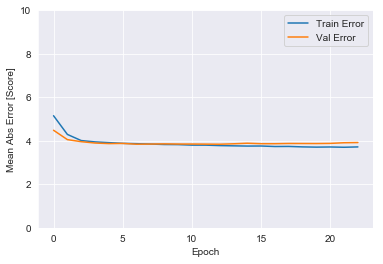

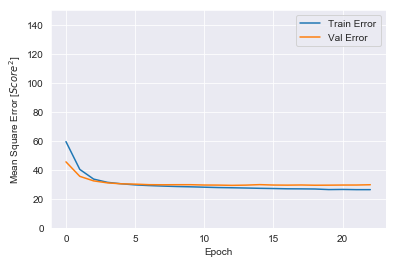

In [117]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [118]:
TE = pd.read_csv('Input/Aggregate/TEAggregate.csv')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Zach Ertz,1,PHI,11.111111,8.333333,75.0,87.666667,0.555556,7.9,10.5,0.000000,0.000000,0.0,0,21.8
Travis Kelce,2,KC,8.600000,5.700000,66.3,78.700000,0.600000,9.2,13.8,0.000000,0.000000,0.0,0,18.1
George Kittle,3,SF,7.100000,5.000000,70.4,77.500000,0.300000,10.9,15.5,0.000000,0.000000,0.0,0,15.4
Eric Ebron,4,IND,7.222222,4.333333,60.0,51.444444,1.000000,7.1,11.9,0.222222,0.111111,0.5,1,16.5
Jared Cook,5,OAK,6.555556,4.666667,71.2,60.666667,0.333333,9.3,13.0,0.000000,0.000000,0.0,0,13.4


In [119]:
TERZ = pd.read_csv('Input/RZ/TERZ.csv')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,1.777778,0.888889,50.0,9.555556,0.777778,5.4,10.8,0.222222,0.111111,0.5,0.111111,7.2
Travis Kelce,1.500000,0.900000,60.0,7.900000,0.500000,5.3,8.8,0.000000,0.000000,0.0,0.000000,4.7
Zach Ertz,1.888889,1.111111,58.8,7.333333,0.555556,3.9,6.6,0.000000,0.000000,0.0,0.000000,5.2
Trey Burton,1.000000,0.888889,88.9,4.666667,0.444444,4.7,5.2,0.111111,0.222222,2.0,0.000000,4.3
OJ Howard,0.777778,0.555556,71.4,5.555556,0.444444,7.1,10.0,0.000000,0.000000,0.0,0.000000,3.8


In [120]:
TEsnaps = pd.read_csv('Input/Aggregate/TESnaps.csv')
TEsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jordan Franks,CIN,TE,1,1,1.0,1.5,0.0,100.0,100.0,100.0,4.2,420.0
1,2,Erik Swoope,IND,TE,5,55,11.0,11.2,0.0,14.5,12.7,14.5,33.3,60.5
2,3,Eric Ebron,IND,TE,9,360,40.0,56.0,0.6,18.1,11.4,18.6,148.4,41.2
3,4,Seth DeValve,CLE,TE,7,39,5.6,7.8,0.0,10.3,7.7,10.3,14.4,36.9
4,5,Mo Alie-Cox,IND,TE,5,105,21.0,29.3,0.0,9.5,5.7,9.5,29.2,27.8


In [121]:
TEsnaps = TEsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
TEsnaps = TEsnaps.set_index('Name')

In [122]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
BAL,12.59
JAX,14.20
TEN,7.17
BUF,10.21
MIN,12.92


In [123]:
TESalaries = pd.read_csv('Input/Salaries/TESalaries.csv').dropna()
TESalaries = TESalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
TESalaries = TESalaries.set_index('Opponent')
TESalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
NO,Zach Ertz,PHI,6600.0,18.84
LAR,Travis Kelce,KC,6500.0,18.46
DET,Greg Olsen,CAR,5000.0,12.35
TEN,Jack Doyle,IND,4200.0,11.08
ARI,Jared Cook,OAK,3900.0,10.18


In [124]:
TESalaries = TESalaries.join(TEDef).join(QBDefense)
TESalaries = TESalaries.set_index('Team').join(Vegas).join(WROffense)
TESalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Ricky Seals-Jones,2900.0,8.09,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,Jermaine Gresham,2600.0,2.91,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ARI,John Phillips,2500.0,0.43,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
ATL,Austin Hooper,4500.0,10.09,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111
ATL,Eric Saubert,2500.0,0.92,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111


In [125]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,8.09,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Jermaine Gresham,2600.0,2.91,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
John Phillips,2500.0,0.43,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.2,1.780645,68.8,32.051613,57.6,166.045161,5.2,9.0,0.890323,64
Austin Hooper,4500.0,10.09,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111
Eric Saubert,2500.0,0.92,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,51.3,3.220902,69.0,39.983607,71.1,318.980328,8.0,11.2,2.332377,111


In [126]:
TEs = TESalaries.join(TEavg).join(TERZ).join(TEsnaps).dropna()
TEs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,8.09,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.0,41.1,70.9,0.0,13.0,6.5,13.0,15.3
Jermaine Gresham,2600.0,2.91,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.3,29.6,48.8,0.0,3.4,2.9,3.4,5.7
John Phillips,2500.0,0.43,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,0.0,0.0,0.0,12.0,16.4,0.0,0.0,0.0,0.0,0.0
Austin Hooper,4500.0,10.09,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,0.0,3.6,56.3,82.0,0.0,10.8,9.1,10.8,21.3
Eric Saubert,2500.0,0.92,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,0.0,0.0,0.0,7.8,11.3,0.0,8.6,4.3,8.6,9.0


In [127]:
columns = TE_train.drop('Score', axis=1)
X_test = TEs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
TEs['DNN'] = new_predictions

In [128]:
X_train = TEtrain.drop('Score', axis=1).astype('float64')
y_train = TEtrain.Score
X_test = TEs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
TENe = neigh.predict(X_test)
TEs['NeProjections'] = TENe

In [129]:
TEScores = pd.read_csv('Scores/TEScores.csv')
TE = pd.DataFrame({'Name': [], 'Score': []})
TE['Name'] = TEScores['Name']
TE['Score'] = TEScores['FantasyPointsDraftKings']
TE = TE.set_index('Name')
TEs = TEs.join(TE)
TEs = TEs.dropna()
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,8.09,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,41.1,70.9,0.0,13.0,6.5,13.0,15.3,9.321004,4.36,1.5
Jermaine Gresham,2600.0,2.91,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,29.6,48.8,0.0,3.4,2.9,3.4,5.7,1.265835,6.34,1.8
John Phillips,2500.0,0.43,14.76,30.2,59.400735,398.817647,6.7,19.652206,12.324265,45.9,...,12.0,16.4,0.0,0.0,0.0,0.0,0.0,1.725925,2.58,0.0
Austin Hooper,4500.0,10.09,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,56.3,82.0,0.0,10.8,9.1,10.8,21.3,8.014790,8.60,6.7
Eric Saubert,2500.0,0.92,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,7.8,11.3,0.0,8.6,4.3,8.6,9.0,1.545634,3.06,0.0
Logan Paulsen,2500.0,0.61,14.53,19.0,62.222222,328.555556,5.3,18.888889,13.111111,44.1,...,26.4,38.5,0.0,2.1,2.1,2.1,6.8,-1.550025,2.68,3.9
Mark Andrews,2600.0,6.15,16.00,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,26.4,35.4,0.0,13.4,8.8,13.4,24.1,5.105236,5.16,2.9
Hayden Hurst,2500.0,3.64,16.00,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,22.8,31.8,0.9,8.8,4.4,9.6,13.8,5.954931,5.68,0.0
Nick Boyle,2500.0,2.66,16.00,32.0,71.555556,454.555556,6.4,26.444444,14.444444,56.2,...,40.1,53.6,0.0,7.5,3.9,7.5,7.6,4.375031,3.38,7.6


In [130]:
y_test = TEs.Score
y_pred = TEs.DNN
mean_squared_error(y_test, y_pred)

40.703097079904055

In [131]:
y_test = TEs.Score
y_pred = TEs.NeProjections
mean_squared_error(y_test, y_pred)

33.90145555555556